In [47]:
import pandas as pd
import numpy as np
import talib as ta
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random
import seaborn as sns
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
data=pd.read_csv(r"C:\Users\mmehu\japan.csv")
RFC=RandomForestClassifier()

In [48]:
def Scaler(x):
    a=x-x.min()
    b=x.max()-x.min()
    c=-1+2*a/b
    return np.array(c)

In [49]:
data.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-11,9701.320313,9764.730469,9673.599609,9705.250000,9705.250000,222400.0
1,2010-06-14,9824.929688,9882.049805,9819.950195,9879.849609,9879.849609,97300.0
2,2010-06-15,9845.650391,9911.730469,9826.440430,9887.889648,9887.889648,101700.0
3,2010-06-16,10043.099609,10109.860352,10033.240234,10067.150391,10067.150391,120300.0
4,2010-06-17,10009.250000,10053.450195,9989.209961,9999.400391,9999.400391,97600.0
5,2010-06-18,10027.980469,10029.110352,9965.160156,9995.019531,9995.019531,98500.0
6,2010-06-21,10109.269531,10251.900391,10109.269531,10238.009766,10238.009766,123000.0
7,2010-06-22,10131.910156,10183.889648,10105.480469,10112.889648,10112.889648,114900.0
8,2010-06-23,9973.000000,9975.009766,9912.799805,9923.700195,9923.700195,102600.0
9,2010-06-24,9902.620117,10009.370117,9893.750000,9928.339844,9928.339844,94900.0


In [50]:
data=data.replace(0.0,np.NAN)

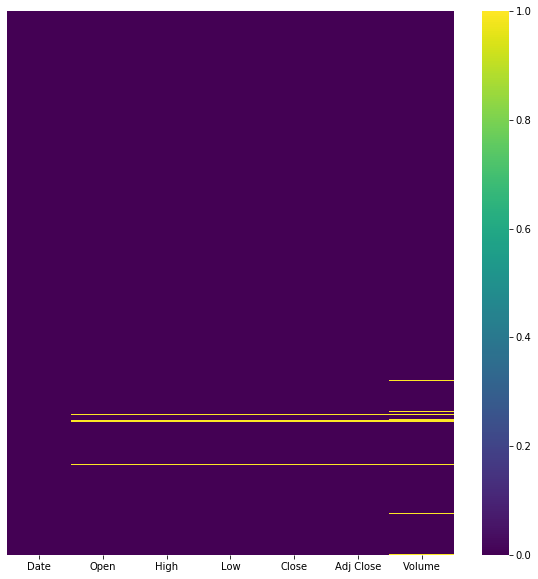

In [51]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [52]:
data.dropna(inplace=True)

In [53]:
data.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-11,9701.320313,9764.730469,9673.599609,9705.250000,9705.250000,222400.0
1,2010-06-14,9824.929688,9882.049805,9819.950195,9879.849609,9879.849609,97300.0
2,2010-06-15,9845.650391,9911.730469,9826.440430,9887.889648,9887.889648,101700.0
3,2010-06-16,10043.099609,10109.860352,10033.240234,10067.150391,10067.150391,120300.0
4,2010-06-17,10009.250000,10053.450195,9989.209961,9999.400391,9999.400391,97600.0
5,2010-06-18,10027.980469,10029.110352,9965.160156,9995.019531,9995.019531,98500.0
6,2010-06-21,10109.269531,10251.900391,10109.269531,10238.009766,10238.009766,123000.0
7,2010-06-22,10131.910156,10183.889648,10105.480469,10112.889648,10112.889648,114900.0
8,2010-06-23,9973.000000,9975.009766,9912.799805,9923.700195,9923.700195,102600.0
9,2010-06-24,9902.620117,10009.370117,9893.750000,9928.339844,9928.339844,94900.0


In [54]:
high=data.High
low=data.Low
open=data.Open
close=data.Close
date=data.Date

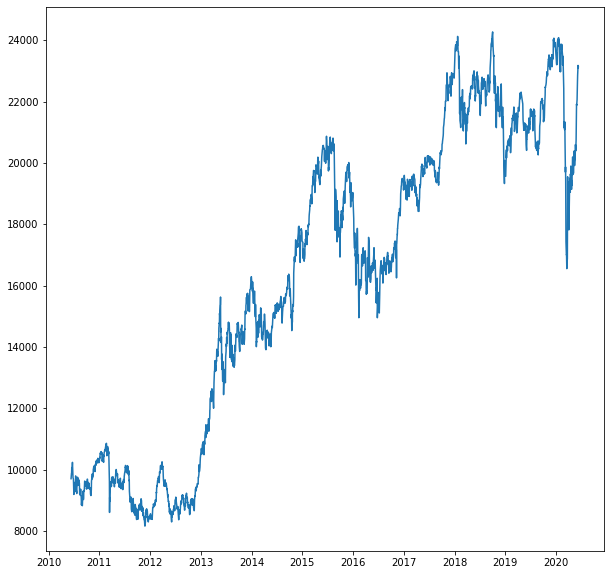

In [55]:
dict={"Date":date,"Close":close}
ts=pd.DataFrame(data=dict)
ts['Date'] = pd.to_datetime(ts['Date'], format="%Y/%m/%d")
ts.set_index(ts["Date"],drop=True,inplace=True)
ts.drop(["Date"],axis=1,inplace=True)
rcParams['figure.figsize']=10,10
plt.plot(ts);

# INDICATORS

In [63]:
sma=ta.SMA(close, 20)
ema=ta.EMA(close, 12)
macd, macdsignal, macdhist=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #MACD>MSIG= BUY signal
rsi=ta.RSI(close, timeperiod=14)
willr=ta.WILLR(high, low, close) #above -20 overbought below -80 oversold
slowk,slowd=ta.STOCH(high,low,close,fastk_period=14)
roc = ta.ROC(close, timeperiod=10)
trix = ta.TRIX(close, timeperiod=5)
sar=ta.SAR(high,low)
cci=ta.CCI(high,low,close)
atr=ta.ATR(high,low,close,timeperiod=14)
adx=ta.ADX(high,low,close,timeperiod=14)

In [64]:
dict={"Close":close,"SMA":sma, "EMA":ema,"MACD":macd, 
      "RSI":rsi,"WillR":willr,"Slowk":slowk,"Slowd":slowd,"ROC":roc,"TRIX":trix,'SAR':sar,'CCI':cci,'ATR':atr,'ADX':adx}
featuredata=pd.DataFrame(data=dict)
featuredata.dropna(inplace=True)


In [65]:
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX
33,9537.299805,9464.654053,9543.117942,-85.159875,49.693948,-42.782531,77.003357,74.113477,-2.633324,0.189082,9199.254019,15.120670,165.482442,13.272140
34,9570.309570,9483.589551,9547.301269,-74.402389,50.724399,-37.553180,67.341956,73.715614,-1.189617,0.166684,9210.475130,31.885278,163.598721,12.489320
35,9694.009766,9508.104541,9569.871807,-55.258448,54.486733,-17.956806,67.235828,70.527047,3.036123,0.183713,9221.471819,76.364309,164.810978,12.144182
36,9489.339844,9519.232520,9557.482275,-55.956853,47.961625,-50.380266,64.703249,66.427011,2.268710,0.121543,9232.248574,-12.941764,168.705897,11.585191
37,9653.919922,9535.026514,9572.318836,-42.737456,52.851245,-18.211498,71.150477,67.696518,4.696298,0.111563,9242.809794,57.485938,170.907638,10.853429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,22695.740234,21009.104199,21700.136129,725.268986,76.888169,-7.294355,94.290378,95.323814,10.429142,0.934836,21604.423313,120.405453,396.745536,28.692128
2463,22863.730469,21143.336231,21879.150643,764.367698,78.020247,-1.717476,94.706369,94.767120,12.142196,0.924219,21865.122635,107.316895,390.000877,30.726690
2464,23178.099609,21282.708203,22078.988946,811.367729,79.995034,-0.000000,96.996056,95.330934,11.746651,0.928408,22073.682092,120.396390,384.598610,32.914039
2465,23091.029297,21418.935645,22234.687461,831.998979,77.907228,-3.326026,98.318833,96.673753,8.555521,0.884652,22294.565596,102.398967,375.177923,34.586745


In [66]:
featuredata["ups and downs"]=featuredata["Close"].shift(-1)-featuredata["Close"]
featuredata


,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs
33,9537.299805,9464.654053,9543.117942,-85.159875,49.693948,-42.782531,77.003357,74.113477,-2.633324,0.189082,9199.254019,15.120670,165.482442,13.272140,33.009765
34,9570.309570,9483.589551,9547.301269,-74.402389,50.724399,-37.553180,67.341956,73.715614,-1.189617,0.166684,9210.475130,31.885278,163.598721,12.489320,123.700196
35,9694.009766,9508.104541,9569.871807,-55.258448,54.486733,-17.956806,67.235828,70.527047,3.036123,0.183713,9221.471819,76.364309,164.810978,12.144182,-204.669922
36,9489.339844,9519.232520,9557.482275,-55.956853,47.961625,-50.380266,64.703249,66.427011,2.268710,0.121543,9232.248574,-12.941764,168.705897,11.585191,164.580078
37,9653.919922,9535.026514,9572.318836,-42.737456,52.851245,-18.211498,71.150477,67.696518,4.696298,0.111563,9242.809794,57.485938,170.907638,10.853429,-11.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,22695.740234,21009.104199,21700.136129,725.268986,76.888169,-7.294355,94.290378,95.323814,10.429142,0.934836,21604.423313,120.405453,396.745536,28.692128,167.990235
2463,22863.730469,21143.336231,21879.150643,764.367698,78.020247,-1.717476,94.706369,94.767120,12.142196,0.924219,21865.122635,107.316895,390.000877,30.726690,314.369140
2464,23178.099609,21282.708203,22078.988946,811.367729,79.995034,-0.000000,96.996056,95.330934,11.746651,0.928408,22073.682092,120.396390,384.598610,32.914039,-87.070312
2465,23091.029297,21418.935645,22234.687461,831.998979,77.907228,-3.326026,98.318833,96.673753,8.555521,0.884652,22294.565596,102.398967,375.177923,34.586745,33.919922


In [67]:
featuredata["direction"]=featuredata.apply(lambda x:1 if x["ups and downs"]>0 else (-1 if x["ups and downs"]<0 else 0), axis=1) 
#featuredata["direction"]=featuredata.apply(lambda x:-1 if x["ups and downs"]<0 else 0, axis=1)
#featuredata.dropna(inplace=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
33,9537.299805,9464.654053,9543.117942,-85.159875,49.693948,-42.782531,77.003357,74.113477,-2.633324,0.189082,9199.254019,15.120670,165.482442,13.272140,33.009765,1
34,9570.309570,9483.589551,9547.301269,-74.402389,50.724399,-37.553180,67.341956,73.715614,-1.189617,0.166684,9210.475130,31.885278,163.598721,12.489320,123.700196,1
35,9694.009766,9508.104541,9569.871807,-55.258448,54.486733,-17.956806,67.235828,70.527047,3.036123,0.183713,9221.471819,76.364309,164.810978,12.144182,-204.669922,-1
36,9489.339844,9519.232520,9557.482275,-55.956853,47.961625,-50.380266,64.703249,66.427011,2.268710,0.121543,9232.248574,-12.941764,168.705897,11.585191,164.580078,1
37,9653.919922,9535.026514,9572.318836,-42.737456,52.851245,-18.211498,71.150477,67.696518,4.696298,0.111563,9242.809794,57.485938,170.907638,10.853429,-11.799805,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,22695.740234,21009.104199,21700.136129,725.268986,76.888169,-7.294355,94.290378,95.323814,10.429142,0.934836,21604.423313,120.405453,396.745536,28.692128,167.990235,1
2463,22863.730469,21143.336231,21879.150643,764.367698,78.020247,-1.717476,94.706369,94.767120,12.142196,0.924219,21865.122635,107.316895,390.000877,30.726690,314.369140,1
2464,23178.099609,21282.708203,22078.988946,811.367729,79.995034,-0.000000,96.996056,95.330934,11.746651,0.928408,22073.682092,120.396390,384.598610,32.914039,-87.070312,-1
2465,23091.029297,21418.935645,22234.687461,831.998979,77.907228,-3.326026,98.318833,96.673753,8.555521,0.884652,22294.565596,102.398967,375.177923,34.586745,33.919922,1


In [68]:
featuredata=featuredata.reset_index(drop=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,9537.299805,9464.654053,9543.117942,-85.159875,49.693948,-42.782531,77.003357,74.113477,-2.633324,0.189082,9199.254019,15.120670,165.482442,13.272140,33.009765,1
1,9570.309570,9483.589551,9547.301269,-74.402389,50.724399,-37.553180,67.341956,73.715614,-1.189617,0.166684,9210.475130,31.885278,163.598721,12.489320,123.700196,1
2,9694.009766,9508.104541,9569.871807,-55.258448,54.486733,-17.956806,67.235828,70.527047,3.036123,0.183713,9221.471819,76.364309,164.810978,12.144182,-204.669922,-1
3,9489.339844,9519.232520,9557.482275,-55.956853,47.961625,-50.380266,64.703249,66.427011,2.268710,0.121543,9232.248574,-12.941764,168.705897,11.585191,164.580078,1
4,9653.919922,9535.026514,9572.318836,-42.737456,52.851245,-18.211498,71.150477,67.696518,4.696298,0.111563,9242.809794,57.485938,170.907638,10.853429,-11.799805,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,22695.740234,21009.104199,21700.136129,725.268986,76.888169,-7.294355,94.290378,95.323814,10.429142,0.934836,21604.423313,120.405453,396.745536,28.692128,167.990235,1
2399,22863.730469,21143.336231,21879.150643,764.367698,78.020247,-1.717476,94.706369,94.767120,12.142196,0.924219,21865.122635,107.316895,390.000877,30.726690,314.369140,1
2400,23178.099609,21282.708203,22078.988946,811.367729,79.995034,-0.000000,96.996056,95.330934,11.746651,0.928408,22073.682092,120.396390,384.598610,32.914039,-87.070312,-1
2401,23091.029297,21418.935645,22234.687461,831.998979,77.907228,-3.326026,98.318833,96.673753,8.555521,0.884652,22294.565596,102.398967,375.177923,34.586745,33.919922,1


In [69]:
featuredata1=featuredata.dropna()
featuredata1

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,9537.299805,9464.654053,9543.117942,-85.159875,49.693948,-42.782531,77.003357,74.113477,-2.633324,0.189082,9199.254019,15.120670,165.482442,13.272140,33.009765,1
1,9570.309570,9483.589551,9547.301269,-74.402389,50.724399,-37.553180,67.341956,73.715614,-1.189617,0.166684,9210.475130,31.885278,163.598721,12.489320,123.700196,1
2,9694.009766,9508.104541,9569.871807,-55.258448,54.486733,-17.956806,67.235828,70.527047,3.036123,0.183713,9221.471819,76.364309,164.810978,12.144182,-204.669922,-1
3,9489.339844,9519.232520,9557.482275,-55.956853,47.961625,-50.380266,64.703249,66.427011,2.268710,0.121543,9232.248574,-12.941764,168.705897,11.585191,164.580078,1
4,9653.919922,9535.026514,9572.318836,-42.737456,52.851245,-18.211498,71.150477,67.696518,4.696298,0.111563,9242.809794,57.485938,170.907638,10.853429,-11.799805,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,22613.759766,20858.055664,21519.117201,681.919905,76.335855,-6.869062,95.304614,96.295703,9.801382,0.925967,21300.811856,136.021311,396.025241,26.501061,81.980468,1
2398,22695.740234,21009.104199,21700.136129,725.268986,76.888169,-7.294355,94.290378,95.323814,10.429142,0.934836,21604.423313,120.405453,396.745536,28.692128,167.990235,1
2399,22863.730469,21143.336231,21879.150643,764.367698,78.020247,-1.717476,94.706369,94.767120,12.142196,0.924219,21865.122635,107.316895,390.000877,30.726690,314.369140,1
2400,23178.099609,21282.708203,22078.988946,811.367729,79.995034,-0.000000,96.996056,95.330934,11.746651,0.928408,22073.682092,120.396390,384.598610,32.914039,-87.070312,-1


In [14]:
#featuredata["Closelag1"]=featuredata.Close.shift(1)
#featuredata["Closelag2"]=featuredata.Close.shift(2)
#featuredata.dropna(inplace=True)

In [16]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [17]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [18]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.2min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [36]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 4,
 min_samples_split= 8,
 n_estimators= 100)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)



0.4801641586867305

# GA for classifier

In [72]:
class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            try:
                self.estimator.fit(X_train.iloc[:,chromosome],y_train)
                predictions = self.estimator.predict(X_test.iloc[:,chromosome])            
                scores.append(accuracy_score(y_test,predictions))
            except:
                continue
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [73]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]

In [74]:
sel = GeneticSelector(estimator=RFC,n_gen=20, size=90, n_best=25, n_rand=25, 
                      n_children=25, mutation_rate=0.05)

In [75]:
sel.fit(X,y)

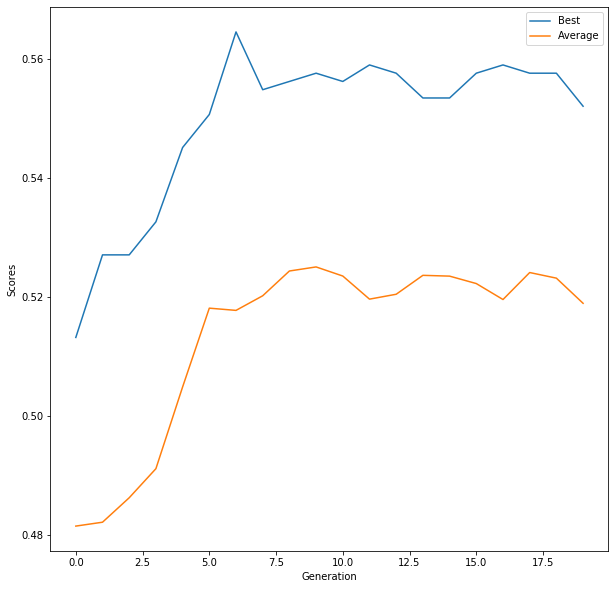

In [76]:
sel.plot_scores()

In [77]:
sel.scores_best

[0.5131761442441054,
 0.5270457697642164,
 0.5270457697642164,
 0.5325936199722607,
 0.5450762829403606,
 0.550624133148405,
 0.5644937586685159,
 0.5547850208044383,
 0.5561719833564494,
 0.5575589459084604,
 0.5561719833564494,
 0.5589459084604715,
 0.5575589459084604,
 0.5533980582524272,
 0.5533980582524272,
 0.5575589459084604,
 0.5589459084604715,
 0.5575589459084604,
 0.5575589459084604,
 0.5520110957004161]

In [78]:
sel.chromosomes_best

[array([ True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True, False]),
 array([False, False,  True, False,  True,  True,  True, False, False,
        False,  True,  True, False]),
 array([False, False, False,  True,  True,  True,  True, False, False,
        False,  True,  True,  True]),
 array([False, False, False,  True, False,  True,  True, False, False,
        False,  True,  True,  True]),
 array([False, False,  True, False,  True,  True, False,  True, False,
        False, False, False, False]),
 array([False, False,  True, False,  True,  True, False,  True, False,
        False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False]),
 array([False, False,  True, False,  True,  True, False,  True, False,
        False, False, False, False]),
 array([False, False,  True, False,  True,  True, False,  True, False,
        False, False, False, False]),
 array([False, Fals

# PCA

In [ ]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]


In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
x_pc=pca.fit_transform(X)

In [ ]:
df=pd.DataFrame(data=x_pc,columns=["PC1","PC2","PC3"])
df['direction']=featuredata1['direction']
df

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [ ]:
X=df[['PC1','PC2','PC3']]
y=df["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [496]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 90,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split= 12,
 n_estimators= 100)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)
X=df[["PC1","PC2","PC3"]]
RescaledX=Scaler(X)
y=df["direction"]
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)
RFC.fit(X_train,y_train)
predictions = RFC.predict(X_test)            
accuracy_score(y_test,predictions)

0.5280437756497948

# PCA+GA

In [349]:
X=df[["PC1","PC2","PC3"]]
y=df["direction"]

In [196]:
sel1 = GeneticSelector(estimator=RFC,n_gen=40, size=20, n_best=5, n_rand=5, 
                      n_children=3, mutation_rate=0.05)

In [197]:
sel1.fit(X,y)

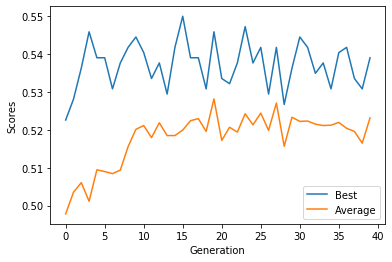

In [198]:
sel1.plot_scores()

In [199]:
sel1.scores_best

[0.5225718194254446,
 0.5280437756497948,
 0.5362517099863201,
 0.5458276333789329,
 0.5389876880984952,
 0.5389876880984952,
 0.53077975376197,
 0.5376196990424077,
 0.5417236662106704,
 0.5444596443228454,
 0.5403556771545828,
 0.533515731874145,
 0.5376196990424077,
 0.5294117647058824,
 0.5417236662106704,
 0.5499316005471956,
 0.5389876880984952,
 0.5389876880984952,
 0.53077975376197,
 0.5458276333789329,
 0.533515731874145,
 0.5321477428180574,
 0.5376196990424077,
 0.5471956224350205,
 0.5376196990424077,
 0.5417236662106704,
 0.5294117647058824,
 0.5417236662106704,
 0.5266757865937073,
 0.5362517099863201,
 0.5444596443228454,
 0.5417236662106704,
 0.5348837209302325,
 0.5376196990424077,
 0.53077975376197,
 0.5403556771545828,
 0.5417236662106704,
 0.533515731874145,
 0.53077975376197,
 0.5389876880984952]

# Direction

In [413]:
best_chromosome=[False, False,  True, False,  True, False, False,  True, False,
        False, False, False,  True, False, False]

In [414]:
X=featuredata[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX','Upper','Lower']]
y=featuredata['direction']

In [415]:
    X   = pd.DataFrame(data=Scaler(X))
X_train = X[:int(X.shape[0]*0.7)]
X_test  = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test  = y[int(X.shape[0]*0.7):]

In [416]:
RFC=RandomForestClassifier(bootstrap= True,
 max_depth= 100,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 12,
 n_estimators= 100)

In [456]:
RFC.fit(X_train.iloc[:,best_chromosome],y_train)
predictions = RFC.predict(X_test.iloc[:,best_chromosome])  

In [418]:
predictions=pd.DataFrame(data=predictions,columns=['direction'])

In [419]:
y_test.tail(1),predictions.tail(1)

(2434    0
 Name: direction, dtype: int64,
      direction
 730         -1)

# Price

In [426]:
RFR=RandomForestRegressor(n_jobs=-1)

# GA for regression

In [436]:
class GeneticSelectorRegression():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            RFR.fit(X_train.iloc[:,chromosome],y_train)
            predictions = RFR.predict(X_test.iloc[:,chromosome])            
            scores.append(RFR.score)
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [440]:
sel2=GeneticSelectorRegression(estimator=RFC,n_gen=7, size=300, n_best=40, n_rand=40,
                               n_children=30, mutation_rate=0.05)

In [441]:
X=featuredata1[['Close','SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX']]
y=featuredata1['ups and downs']

In [442]:
sel2.fit(X,y)

TypeError: '<' not supported between instances of 'method' and 'method'

In [ ]:
sel2.plot_scores()

In [ ]:
sel2.scores_best